In [1]:
import numpy as np
from siphon.catalog import TDSCatalog
import xarray as xr
# from xarray.backends import NetCDF4DataStore
# import netCDF4 as nc
import matplotlib.pylab as plt
import pandas as pd

from dask.diagnostics import ProgressBar
import dask
# dask.config.set(**{'array.slicing.split_large_chunks': True})
from dask.distributed import Client, LocalCluster



In [2]:
# client = Client(n_workers=90)
# # # client = Client(cluster)

In [3]:
# client

In [ ]:
# %%time
# from glob import glob
# ds_concat = [xr.open_dataset(f) for f in sst_givenyear_list]

CPU times: user 15.3 s, sys: 2.73 s, total: 18 s
Wall time: 6min 31s


In [7]:
years=np.arange(1982,1983)

In [95]:
%%time
for year in years:
    cat = TDSCatalog('https://www.ncei.noaa.gov/thredds-ocean/catalog/pathfinder/Version5.3/L3C/'+ str(year) +'/data/catalog.html')
    ult_list=['https://www.ncei.noaa.gov/thredds-ocean/dodsC/pathfinder/Version5.3/L3C/'+ str(year) +'/data/' + names for names in cat.datasets]
    ult_list.sort()
    
    new_ult_list=[nombres +'#fillmismatch' for nombres in ult_list]
    
    index_files=[]
    for files in new_ult_list:
        if 'night' in files:
            index_files.append(True)
        else:
            index_files.append(False)

    sst_givenyear_list=np.array(new_ult_list)[index_files]
    
    SST_year=xr.DataArray(coords=(range(len(sst_givenyear_list)),range(168),range(132)),dims=['time','lat','lon'])
    sst_time_string=[]
    
    
    for idd in range(len(sst_givenyear_list)):
        var=xr.open_dataset(sst_givenyear_list[idd])#['sea_surface_temperature']
        var_sec=var.sel(lat=slice(-27,-34),lon=slice(-53,-47.5))
        var_new_sec=xr.where(var_sec['quality_level']>1,var_sec['sea_surface_temperature'].copy(),np.nan)

        # sst_month=sst.groupby(sst.time.dt.month).mean()

        SST_year[idd,:,:]=var_new_sec[0,:,:].data
        sst_time_string.append(var.time.data)

    
    SST_year['lon']=var_new_sec.lon.data
    SST_year['lat']=var_new_sec.lat.data
    SST_year['time']=np.array(sst_time_string).T[0]
    SST_year.name='SST_daily'
    # sst.to_netcdf('/homes/metogra/iufarias/Alkenone_SST/data_processed/daily/sst_total_year_{0}'.format(year),mode='w')


    
    sst_m=SST_year.groupby(SST_year.time.dt.month).mean().compute()
    sst_m.name='SST_montly_mean'
    # sst_m.to_netcdf('/homes/metogra/iufarias/Alkenone_SST/data_processed/sst_year_{0}'.format(year),mode='w') 

/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/siphon/catalog.py:293: UserWarning: URL https://www.ncei.noaa.gov/thredds-ocean/catalog/pathfinder/Version5.3/L3C/1982/data/catalog.html returned HTML. Changing to: https://www.ncei.noaa.gov/thredds-ocean/catalog/pathfinder/Version5.3/L3C/1982/data/catalog.xml
  new_url))


CPU times: user 23.2 s, sys: 3.52 s, total: 26.7 s
Wall time: 22min 23s


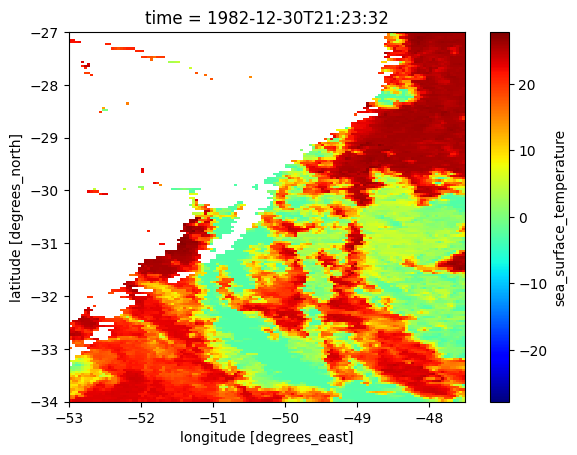

In [111]:
(var['sea_surface_temperature'].sel(lat=slice(-27,-34),lon=slice(-53,-47.5))-273).plot(cmap='jet')

In [120]:
cat = TDSCatalog('https://www.ncei.noaa.gov/thredds-ocean/catalog/pathfinder/Version5.3/L3C/'+ str(year) +'/data/catalog.html')
ult_list=['https://www.ncei.noaa.gov/thredds-ocean/dodsC/pathfinder/Version5.3/L3C/'+ str(year) +'/data/' + names for names in cat.datasets]
ult_list.sort()

new_ult_list=[nombres +'#fillmismatch' for nombres in ult_list]

index_files=[]
for files in new_ult_list:
    if 'day' in files:
        index_files.append(True)
    else:
        index_files.append(False)

sst_givenyear_list=np.array(new_ult_list)[index_files]

SST_year=xr.DataArray(coords=(range(len(sst_givenyear_list)),range(168),range(132)),dims=['time','lat','lon'])
sst_time_string=[]


var=xr.open_dataset(sst_givenyear_list[idd])#['sea_surface_temperature']

/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/siphon/catalog.py:293: UserWarning: URL https://www.ncei.noaa.gov/thredds-ocean/catalog/pathfinder/Version5.3/L3C/1982/data/catalog.html returned HTML. Changing to: https://www.ncei.noaa.gov/thredds-ocean/catalog/pathfinder/Version5.3/L3C/1982/data/catalog.xml
  new_url))


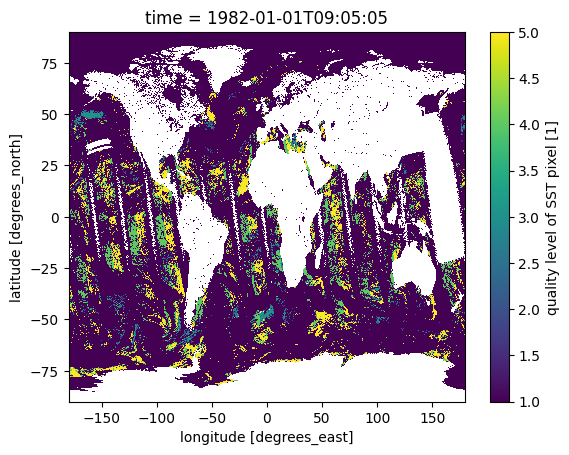

In [121]:
var['quality_level'].plot()

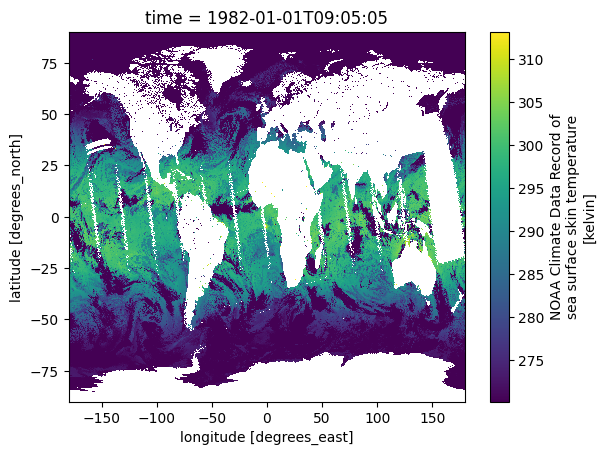

In [122]:
var['sea_surface_temperature'].plot()

In [14]:
# %%time
# varx=xr.open_mfdataset(sst_givenyear_list[:10],combine='by_coords',
#                        data_vars='minimal',coords='minimal',decode_cf=False)

# decode_cf=False
# parallel=True
# concat_dim="time"